# Machine Learning Engineer Nanodegree Capstone
## Predicting Airbnb User Bookings

## Data Exploration - Users

In [7]:
#Import Dependencies
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#Set seaborn figure aesthetics
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

In [23]:
#Import data
train_users = pd.read_csv('train_users.csv')
test_users = pd.read_csv('test_users.csv')

In [26]:
#Print out size of the datasets
print(train_users.shape[0], "users in the training set")
print(test_users.shape[0], "users in the test set")
print(train_users.shape[0] + test_users.shape[0], "total users")

213451 users in the training set
62096 users in the test set
275547 total users


In [28]:
#Merge train and test set users
users = pd.concat((train_users, test_users), axis=0, ignore_index=True)

#Remove ID column since we're only exploring the data and not making predictions yet
users.drop('id', axis=1, inplace=True)
users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20091208061105


In [29]:
#Transform missing data from '-unknown-' to 'NaN'
users.gender.replace('-unknown-', np.nan, inplace=True)
users.first_browser.replace('-unknown-', np.nan, inplace=True)

In [30]:
#Compute NaN % to see how much data is missing
users_nan = (users.isnull().sum() / users.shape[0]) * 100
users_nan[users_nan > 0].drop('country_destination')

age                        42.412365
date_first_booking         67.733998
first_affiliate_tracked     2.208335
first_browser              16.111226
gender                     46.990169
dtype: float64

In [40]:
#Explore user age
users.age.describe()

#Explore ages inputs below legal limit and beyond normal life expectancy
print(sum(users.age > 122), "users above normal life expectancy")
print(sum(users.age < 18), "below legal limit to use Airbnb")

830 users above normal life expectancy
188 below legal limit to use Airbnb


In [43]:
#Explore ages above normal life expectancy
users[users.age > 122]['age'].describe()

count     830.000000
mean     2002.620482
std        94.201344
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [42]:
#Explore ages below legal limit
users[users.age < 18]['age'].describe()

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

In [44]:
#Handle user age by replacing ages above 122 and below 18 with NaN
users.loc[users.age > 122, 'age'] = np.nan
users.loc[users.age < 18, 'age'] = np.nan

In [47]:
#Translate categorical features into categories
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

for categorical_feature in categorical_features:
    users[categorical_feature] = users[categorical_feature].astype('category')

In [49]:
#Transform user data with dates to DateTime
users['date_account_created'] = pd.to_datetime(users['date_account_created'])
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'])
users['date_first_active'] = pd.to_datetime(users['timestamp_first_active'],format='%Y%m%d%H%M%S')

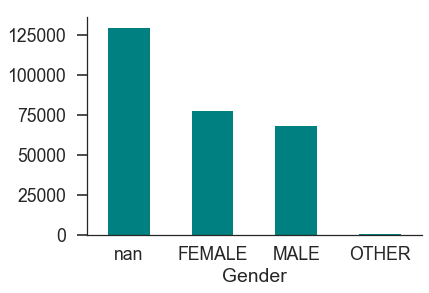

In [52]:
#Visualize the data
users.gender.value_counts(dropna=False).plot(kind='bar', color='gray', rot=0)
plt.xlabel('Gender')
sns.despine()

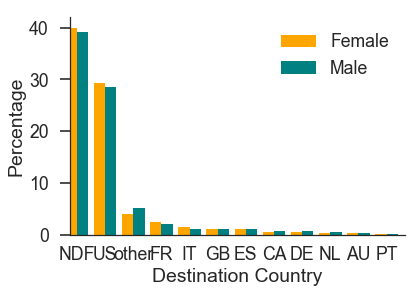

In [69]:
#Explore whether there are any gender preferences when traveling
women = sum(users['gender'] == 'FEMALE')
men = sum(users['gender'] == 'MALE')

female_destinations = users.loc[users['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = users.loc[users['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

female_destinations.plot(kind='bar', width=0.4, color='orange', position=1, label='Female', rot=0)
male_destinations.plot(kind='bar', width=0.4, color='teal', position=0, label='Male', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()
plt.show()

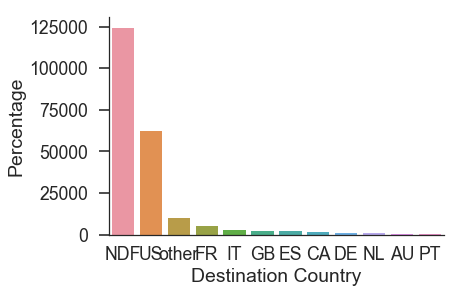

In [62]:
#Explore general preferences when traveling, regardless of sex
sns.countplot(x="country_destination", data=users, order=list(users.country_destination.value_counts().keys()))
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()
plt.show()

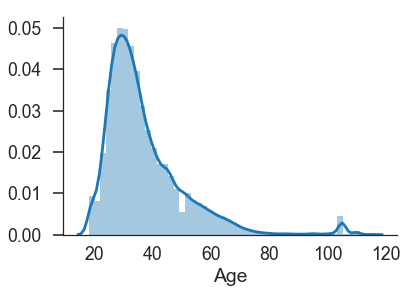

In [64]:
#Explore Age Distribution
sns.distplot(users.age.dropna())
plt.xlabel('Age')
sns.despine()

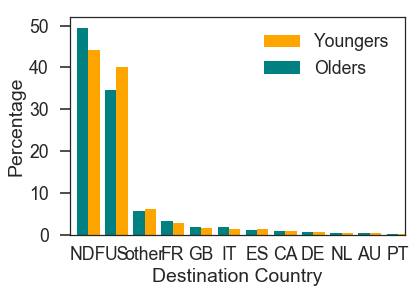

In [70]:
#Pick an arbitrary age and see whether older users travel differently than younger users
age = 45

younger = sum(users.loc[users['age'] < age, 'country_destination'].value_counts())
older = sum(users.loc[users['age'] >= age, 'country_destination'].value_counts())

younger_destinations = users.loc[users['age'] < age, 'country_destination'].value_counts() / younger * 100
older_destinations = users.loc[users['age'] >= age, 'country_destination'].value_counts() / older * 100

younger_destinations.plot(kind='bar', width=0.4, color='orange', position=0, label='Youngers', rot=0)
older_destinations.plot(kind='bar', width=0.4, color='teal', position=1, label='Olders', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine
plt.show()

In [71]:
#Check percentage of users that use English 
print((sum(users.language == 'en') / users.shape[0]) * 100)

96.3675888323952


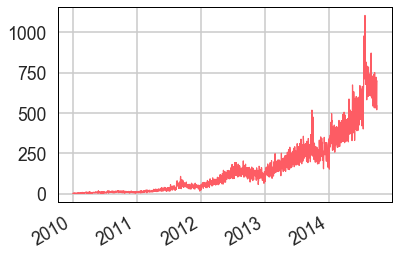

In [73]:
#Check number of accounts created over time
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
users.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64')

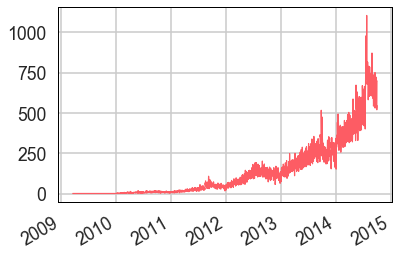

In [74]:
#Check whether first user activitiy correlates with account creation
date_first_active = users.date_first_active.apply(lambda x: datetime.datetime(x.year, x.month, x.day))
date_first_active.value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64')

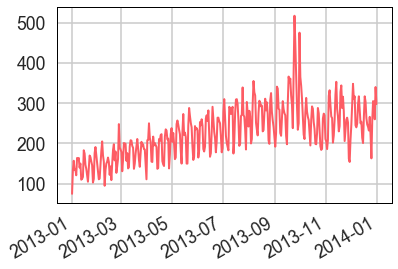

In [77]:
#Explore peaks in 2013
users_2013 = users[users['date_first_active'] > pd.to_datetime(20130101, format='%Y%m%d')]
users_2013 = users_2013[users_2013['date_first_active'] < pd.to_datetime(20140101, format='%Y%m%d')]
date_first_active = users_2013.date_first_active.apply(lambda x: datetime.datetime(x.year, x.month, x.day))
date_first_active.value_counts().plot(kind='line', linewidth=2, color='#FD5C64')
plt.show()

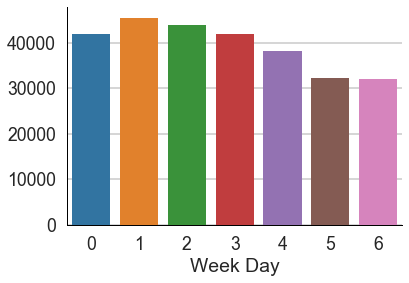

In [79]:
#Look more closely in terms of weekday
weekdays=[]
for date in users.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')
sns.despine()

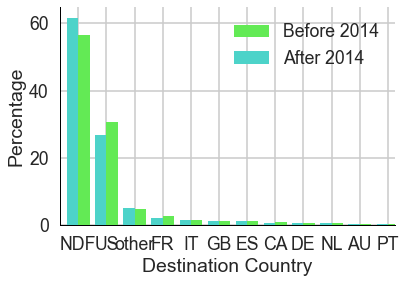

In [80]:
#Check whether new users have different preferences than old users
date = pd.to_datetime(20140101, format='%Y%m%d')

before = sum(users.loc[users['date_first_active'] < date, 'country_destination'].value_counts())
after = sum(users.loc[users['date_first_active'] > date, 'country_destination'].value_counts())

before_destinations = users.loc[users['date_first_active'] < date, 'country_destination'].value_counts() / before * 100
after_destinations = users.loc[users['date_first_active'] > date, 'country_destination'].value_counts() / after * 100

before_destinations.plot(kind='bar', width=0.4, color='#63EA55', position=0, label='Before 2014', rot=0)
after_destinations.plot(kind='bar', width=0.4, color='#4DD3C9', position=1, label='After 2014', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

In [81]:
#Explore affiliate channel data
users.affiliate_channel.value_counts()

direct           181571
sem-brand         36439
sem-non-brand     20075
seo               14362
other              9547
api                8167
content            4118
remarketing        1268
Name: affiliate_channel, dtype: int64

In [82]:
#Explore affiliate provider data
users.affiliate_provider.value_counts()

direct                 181270
google                  65956
other                   13036
facebook                 3996
bing                     3719
craigslist               3475
padmapper                 836
vast                      830
yahoo                     653
facebook-open-graph       566
gsp                       455
meetup                    358
email-marketing           270
naver                      66
baidu                      32
yandex                     18
wayn                        8
daum                        3
Name: affiliate_provider, dtype: int64

In [83]:
#Explore first affiliate tracked data
users.first_affiliate_tracked.value_counts()

untracked        143181
linked            62064
omg               54859
tracked-other      6655
product            2353
marketing           281
local ops            69
Name: first_affiliate_tracked, dtype: int64

## Date Exploration - Sessions

In [ ]:
#Import data  ###MAKE SURE TO RELOAD ORIGINAL USER DATA
train_users = pd.read_csv('train_users.csv')
test_users = pd.read_csv('test_users.csv')
train_users = pd.read_csv('sessions.csv')

In [86]:
#Combine the user train and test data
pd.concat((train_users, test_users), axis=0, ignore_index=True)

#Check size of the data
print(len(users))
print(len(sessions.user_id.unique()))
print(sessions.shape)

275547
135484
(10567737, 6)


In [89]:
#Check total number of missing data in sessions
sessions.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [90]:
sessions.loc[sessions['user_id'].isnull()].head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
6715,NaN,calendar_tab_inner2,-unknown-,-unknown-,Mac Desktop,4890.0
6716,NaN,create,submit,create_user,Mac Desktop,NaN
6717,NaN,header_userpic,data,header_userpic,Mac Desktop,768.0
6718,NaN,calendar_tab_inner2,-unknown-,-unknown-,Mac Desktop,7578.0
19921,NaN,edit,view,edit_profile,iPad Tablet,6194.0


In [91]:
sessions.action_type.unique()

array([nan, 'click', 'data', 'view', 'submit', 'message_post',
       '-unknown-', 'booking_request', 'partner_callback',
       'booking_response', 'modify'], dtype=object)

In [92]:
#Replace missing data '-unknown-' with 'NaN'
sessions['action_type'] = sessions['action_type'].replace('-unknown', np.nan)

In [93]:
sessions.action.value_counts().head()

show              2768278
index              843699
search_results     725226
personalize        706824
search             536057
Name: action, dtype: int64

In [94]:
sessions.action_type.value_counts()

view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [95]:
sessions.loc[sessions.action_type == 'booking_response']

,user_id,action,action_type,action_detail,device_type,secs_elapsed
284946,6udv3scuxe,booking,booking_response,booking,Windows Desktop,71212.0
3657669,yxf0sm9sbw,booking,booking_response,booking,Windows Desktop,36905.0
6543673,yjbnf70oit,booking,booking_response,booking,Windows Desktop,0.0
9658676,nttj7g9av6,booking,booking_response,booking,Windows Desktop,34389.0


In [96]:
sessions.device_type.value_counts()

Mac Desktop                         3594286
Windows Desktop                     2658539
iPhone                              2105031
Android Phone                        839637
iPad Tablet                          683414
Android App Unknown Phone/Tablet     273652
-unknown-                            211279
Tablet                               139886
Linux Desktop                         28373
Chromebook                            22348
iPodtouch                              8198
Windows Phone                          2047
Blackberry                              979
Opera Phone                              68
Name: device_type, dtype: int64

In [97]:
#Reset indexes for user and sessions data to user id
train_users.set_index('id', inplace=True)
sessions.set_index('user_id', inplace=True)

In [99]:
#Combine users data with sessions data for users with a destination
users_with_destination = train_users.loc[train_users['country_destination'] != 'NDF']
a =  users_with_destination.index.values
b = sessions.index.unique()
sessions_id = list(set(a).intersection(b))

users_with_destination_sessions = sessions.loc[sessions_id]
users_with_destination_sessions.action.value_counts()

show                                  547951
personalize                           211836
index                                 209351
search_results                        192670
ajax_refresh_subtotal                 157051
similar_listings                      147387
search                                 66580
update                                 63860
lookup                                 62281
social_connections                     47225
create                                 38650
dashboard                              38519
header_userpic                         36714
reviews                                32361
edit                                   32336
track_page_view                        30214
requested                              29551
active                                 28077
qt2                                    25918
calendar_tab_inner2                    19438
collections                            19343
ajax_check_dates                       18358
confirm_em